## Predicting Bank Customers Churn with Machine learning Algorithms .

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics  
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.svm import SVC


In [2]:
df = pd.read_csv("Churn_Modelling.csv") #loading dataset in notebook

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data analysing and Cleaning.

In [4]:
df.head() #showing first five rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail() #showing last five rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
df.shape #Finding Shape of Our Dataset ( Rows & Columns)

(10000, 14)

In [7]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 10000
Number of Columns 14


In [8]:
# Displaying Information of Our Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
# Checking Null Values in Our Dataset
df.isnull().sum() 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
#Get the overall Satistics of Our Dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
#Dropping Irrelevant Features
new_df = df.drop(['RowNumber', 'CustomerId','Surname'],axis=1)

In [13]:
new_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
new_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [15]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
#dummy_variables for encoding categorical columns. & converting categorical values in to binary form i.e 0 & 1.

new_df = pd.get_dummies(new_df) #,drop_first = True

In [18]:
new_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


# EDA (Exploratory Data Analysis) on the Dataset.

# Data Visualization using various graphs on the Dataset.

In [19]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

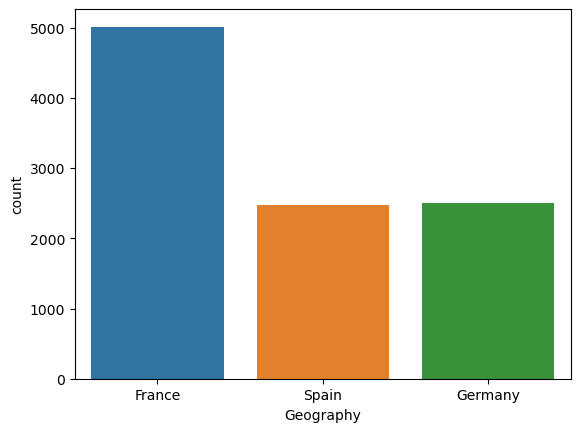

In [20]:
# Bar graph
sns.countplot(df["Geography"])

# we can see in the bar graph that France has the highest number of customers i.e 5014  and spain has the lowest numbers of customers i.e 2477.

In [21]:
#Proportions of those that exited and those that did not
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [22]:
#Calculating the global churn rate
churn_rate = df["Exited"].mean()
churn_rate
# global churn rate = 20.37%

0.2037

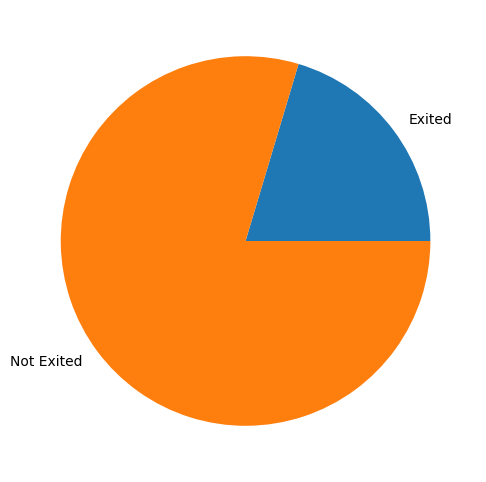

In [23]:
# Creating the pie chart. 

exited_or_not_exited = ['Exited','Not Exited'] 
data = [2037,7963]
 
# Creating plot
fig = plt.figure(figsize =(8, 6))
plt.pie(data, labels = exited_or_not_exited)
# show plot
plt.show()

# In the pie chart graph , we can see that not exited customers are more than the exited customers.

In [24]:
df[['Geography','Exited']].value_counts()

Geography  Exited
France     0         4204
Spain      0         2064
Germany    0         1695
           1          814
France     1          810
Spain      1          413
dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

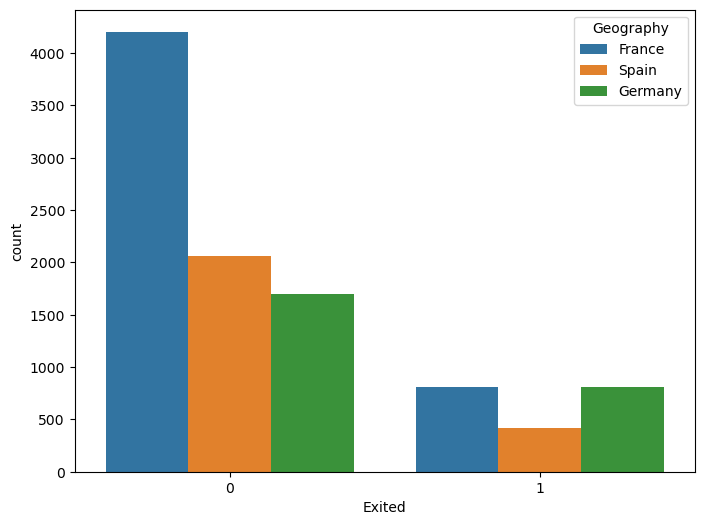

In [25]:
# grouped bar chart
#Here 1 - Exited
   #  0 - Not Exited  
fig = plt.gcf() 
fig.set_size_inches(8, 6) 
sns.countplot(x ='Exited',data=df, hue= 'Geography')


# From the above graph we can see that France is the country having maximum number of not exited customers and  Germany has the maximum number of exited customers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f75c370f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1f75c382520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f75c370c70>],
 'medians': [<matplotlib.lines.Line2D at 0x1f75c382ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f75c382d90>],
 'means': []}

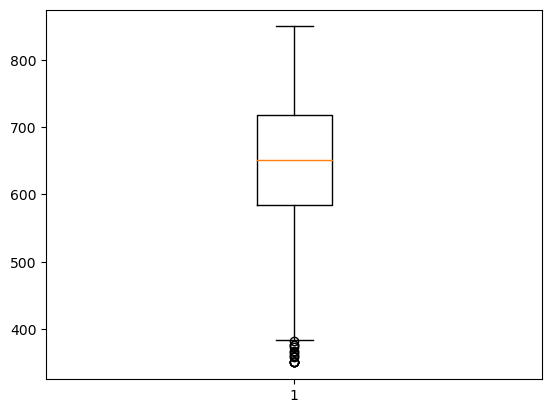

In [26]:
# Creating the boxplot graph.
plt.boxplot(df["CreditScore"])

# From the Boxplot Graph ,we can see that maximum credit score is near about 850, the median of the graph is 650 and the outliers in the graph is from below  390 score.  

In [27]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

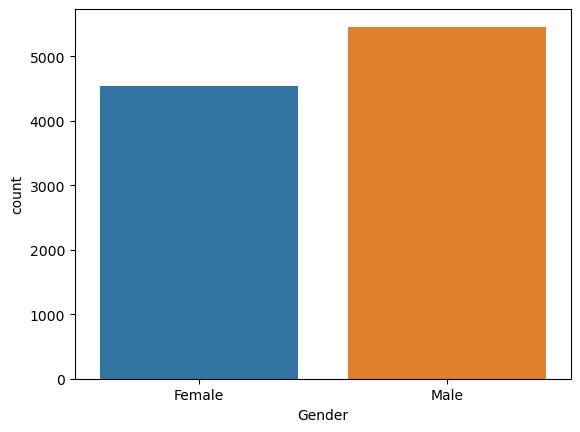

In [28]:
# showing Bar graph
sns.countplot(df.Gender)

# from the above bar graph , it shows that male customers are more than the female customers. 

In [29]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

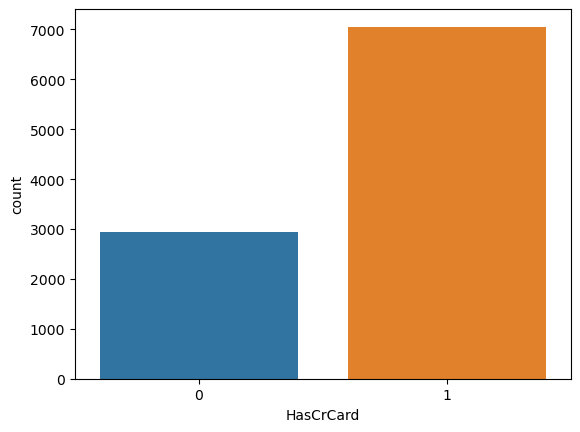

In [30]:
sns.countplot(df.HasCrCard)

# From the above bar graph ,we can see that customers having  a credit card are more than the customers who doesn't have.

In [31]:
df["Age"].max()

92

{'whiskers': [<matplotlib.lines.Line2D at 0x1f75c464940>,
 'caps': [<matplotlib.lines.Line2D at 0x1f75c464ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f75c464670>],
 'medians': [<matplotlib.lines.Line2D at 0x1f75c4744c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f75c474790>],
 'means': []}

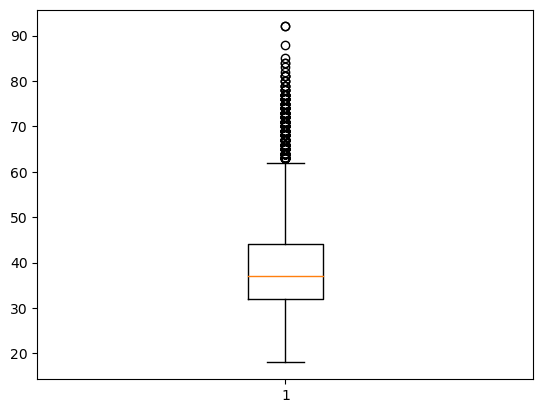

In [32]:
plt.boxplot(df["Age"])

# In the boxplot graph, minimum age of a customer is 18 and the median age group is near about 35 and the outliers are from the age 62 and above

In [33]:
df[['Tenure']].value_counts()

Tenure
2         1048
1         1035
7         1028
8         1025
5         1012
3         1009
4          989
9          984
6          967
10         490
0          413
dtype: int64

In [34]:
df[['Tenure']].max()

Tenure    10
dtype: int64

In [35]:
df[['Tenure']].min()

Tenure    0
dtype: int64

<AxesSubplot:xlabel='Tenure', ylabel='count'>

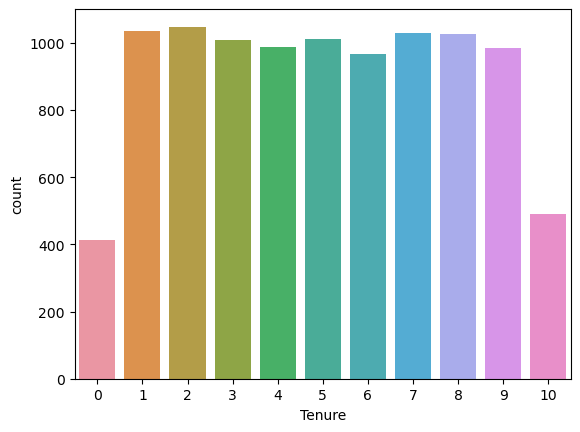

In [36]:
sns.countplot(df.Tenure)

# From the above graph, we can see that maximum customers are from the tenure period 2 

<AxesSubplot:>

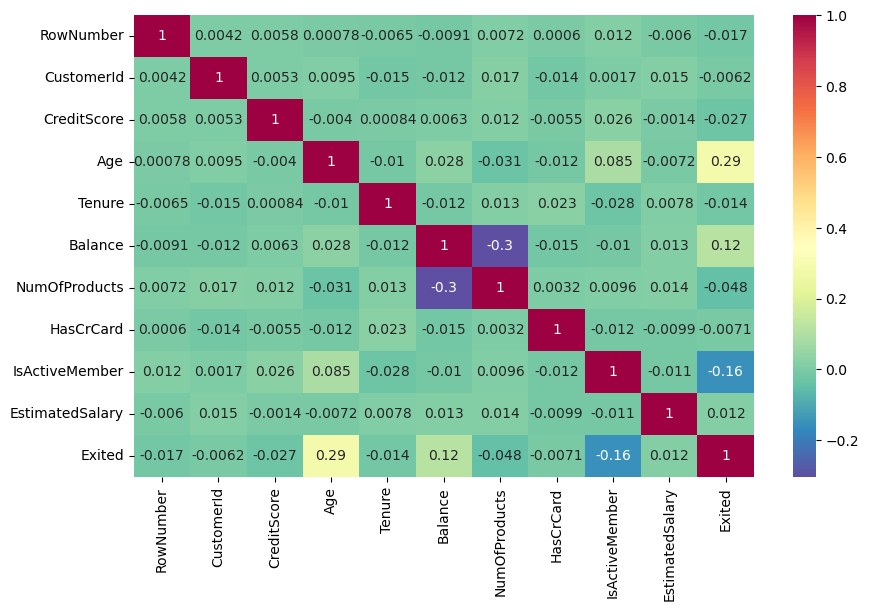

In [37]:
#Finding correlations using Heatmap matrix.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot= True, cmap='Spectral_r')

# From the above heatmap matrix graph, we can see that age and exited columns are positively correlated, and num of product and balance are negatively correlated.

#  Using Pandas Profiler For Quick & Auto EDA

In [38]:
from pandas_profiling import ProfileReport

In [39]:
profile = ProfileReport(new_df,explorative=True,dark_mode=True)

In [40]:
profile.to_file("Churn_pp.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Splitting Dataset into  ( Dependent variable &  Independent variable)

In [41]:
# Exited is our Dependent Variable
x = new_df.drop('Exited',axis=1)
y = new_df['Exited']

In [42]:
x.head() # Here x Is Our Independent variable

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [43]:
pd.DataFrame(y).head() # Here y Is Our dependent variable

,Exited
0,1
1,0
2,1
3,0
4,0


#  Splitting The Dataset into  Test Set & Training Set 

In [44]:
# Dividing data (x and y) into training and test sets using a randomized train-test split. 
# Test set is 30% of total data and a random_state set at 42 for reproducibility.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



#  Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()

In [47]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [48]:
x_train

array([[-0.34459497, -0.65674999, -0.34217046, ...,  1.73073215,
         1.09823226, -1.09823226],
       [-0.09518109, -0.46637979,  0.69816249, ..., -0.57779016,
         1.09823226, -1.09823226],
       [-0.94734518, -0.56156489,  0.35138484, ..., -0.57779016,
        -0.91055421,  0.91055421],
       ...,
       [ 0.86090545, -0.08563939, -1.38250341, ..., -0.57779016,
         1.09823226, -1.09823226],
       [ 0.15423279,  0.39028611,  1.04494014, ..., -0.57779016,
        -0.91055421,  0.91055421],
       [ 0.46600014,  1.1517669 , -1.38250341, ..., -0.57779016,
        -0.91055421,  0.91055421]])

#  Applying Logistic Regression algorithm

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log = LogisticRegression()

In [51]:
log.fit(x_train, y_train)

LogisticRegression()

In [52]:
y_pred1 = log.predict(x_test)


In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test,y_pred1) # Here we get very good accuracy

0.8113333333333334

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [56]:
precision_score(y_test, y_pred1) # precision score is very low

0.5420560747663551

In [57]:
recall_score(y_test, y_pred1) # recall score is very low


0.19863013698630136

In [58]:
f1_score(y_test,y_pred1) # f1 score is very low


0.2907268170426065

In [59]:
# As most of our scores are very low we need to balance our data

##  Applying SMOTE to balance Our  Dataset

In [60]:
from imblearn.over_sampling import SMOTE # Synthetic Minority Oversampling technique

In [61]:
x_res, y_res = SMOTE().fit_resample(x,y)


In [62]:
y_res.value_counts() # As we cam see our data is been balanced

1    7963
0    7963
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

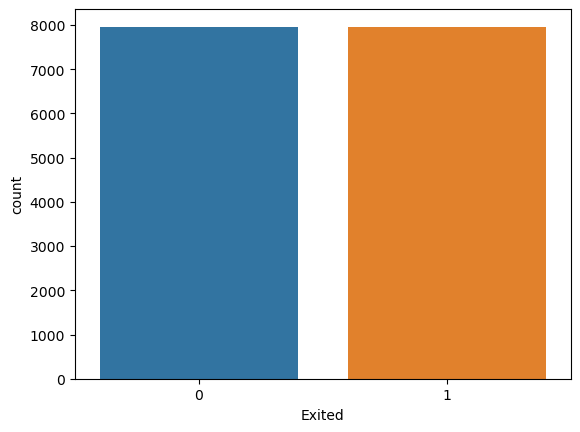

In [63]:
sns.countplot(y_res)

# After Balancing the Dataset, Splitting The Dataset into Training Set and Test Set


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=42)


In [65]:
sc = StandardScaler()

In [66]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [67]:
x_train

array([[-0.24223911, -0.20175037,  0.08090081, ..., -0.4647242 ,
         1.22961064, -0.84499831],
       [ 0.83858236, -0.50301122, -1.02525069, ...,  2.15181389,
        -0.81326557,  1.18343432],
       [-0.71168682,  0.09951048,  0.81833514, ..., -0.4647242 ,
        -0.81326557, -0.84499831],
       ...,
       [ 0.19445644,  0.19993077,  1.1870523 , ..., -0.4647242 ,
        -0.81326557,  1.18343432],
       [ 0.43463898, -0.90469236,  0.81833514, ..., -0.4647242 ,
        -0.81326557, -0.84499831],
       [ 0.52197809,  1.00329304, -1.39396786, ..., -0.4647242 ,
        -0.81326557,  1.18343432]])

##  After Balancing the Dataset Applying Logistic Regression algorithm

In [68]:
log = LogisticRegression()

In [69]:
log.fit(x_train, y_train)


LogisticRegression()

In [70]:
y_pred1 = log.predict(x_test)


In [71]:
accuracy_score(y_test,y_pred1)

0.8409376308078694

In [72]:
precision_score(y_test, y_pred1)

0.8830606352261791

In [73]:
recall_score(y_test, y_pred1)


0.780187074829932

In [74]:
f1_score(y_test,y_pred1)


0.8284424379232507

##  Applying KNeighbors Classifier 

In [75]:
from sklearn.neighbors import KNeighborsClassifier


In [76]:
knn = KNeighborsClassifier()


In [77]:
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [78]:
y_pred2=knn.predict(x_test)


In [79]:
accuracy_score(y_test, y_pred2)


0.8608204269568858

In [80]:
precision_score(y_test, y_pred2)


0.877742946708464

In [81]:
recall_score(y_test, y_pred2)


0.8333333333333334

In [82]:
f1_score(y_test,y_pred2)


0.8549618320610687

## Applying Desicion Tree Classifier


In [83]:
from sklearn.tree import DecisionTreeClassifier


In [84]:
dt = DecisionTreeClassifier()


In [85]:
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [86]:
y_pred3=dt.predict(x_test)


In [87]:
accuracy_score(y_test, y_pred3)


0.8384261197153621

In [88]:
precision_score(y_test, y_pred3)


0.823240589198036

In [89]:
recall_score(y_test, y_pred3)


0.8554421768707483

In [90]:
f1_score(y_test,y_pred3)


0.8390325271059217

## Random Forest Classifier


In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf = RandomForestClassifier()


In [93]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
y_pred4=rf.predict(x_test)


In [95]:
accuracy_score(y_test,y_pred4)

0.8968187526161574

In [96]:
precision_score(y_test, y_pred4)


0.9085714285714286

In [97]:
recall_score(y_test, y_pred4)


0.8788265306122449

In [98]:
f1_score(y_test,y_pred4)


0.8934514804408904

# SVC(Support Vector Classifier Algorithm)


In [99]:
from sklearn import svm


In [100]:
svm = svm.SVC()


In [101]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters

svm.fit(x_train,y_train)


SVC()

In [102]:
# performing predictions on the test dataset

y_pred5=svm.predict(x_test)


In [103]:
accuracy_score(y_test, y_pred5)


0.8815403934700712

In [104]:
precision_score(y_test, y_pred5)


0.9165111940298507

In [105]:
recall_score(y_test, y_pred5)


0.8354591836734694

In [106]:
f1_score(y_test,y_pred5)


0.8741103202846974

## Comparing the accuracy of all algorithms

In [107]:
model_accuracy = pd.DataFrame({
    'Model':['LR','KNN','DT','RF','SVC'],
    'Accuracy':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5), ]})

In [108]:
model_accuracy

,Model,Accuracy
0,LR,0.840938
1,KNN,0.860820
2,DT,0.838426
3,RF,0.896819
4,SVC,0.881540


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

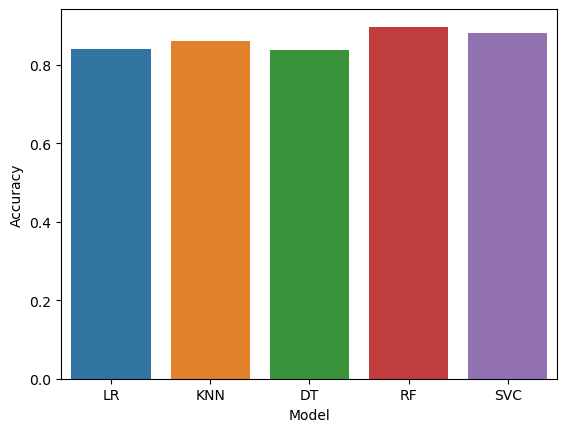

In [109]:
sns.barplot(model_accuracy['Model'],model_accuracy['Accuracy'])

# As we can see, RandomForest Classifier has the highest accuracy among         all Algorithms.


#  Predicting by using RandomForest Classifier .

In [110]:
x.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [113]:
new_df.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1
9999,792,28,4,130142.79,1,1,0,38190.78,0,1,0,0,1,0


In [111]:
# Here, 1 - indicates that the customer is more likely to exit the bank.
#       0- indicates that the customer  is less likely to exit the bank.

rf.predict([[772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1]])

array([1], dtype=int64)

# Here, our output has showned 1 that means the customer is more likely to exit the bank.